## Modern portfolio Theory

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools
np.random.seed(123)

In [2]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
data = pd.read_pickle('vg_points.pkl')

In [4]:
data = pd.crosstab(data.date,data.vg_rider,values=data.vg_points,aggfunc=sum)
daterange = pd.DataFrame(pd.date_range('2017-01-01','2019-05-10'),columns=['date']).set_index('date')
data = pd.concat([daterange,data],1).fillna(1)

In [5]:
data = data.cumsum()

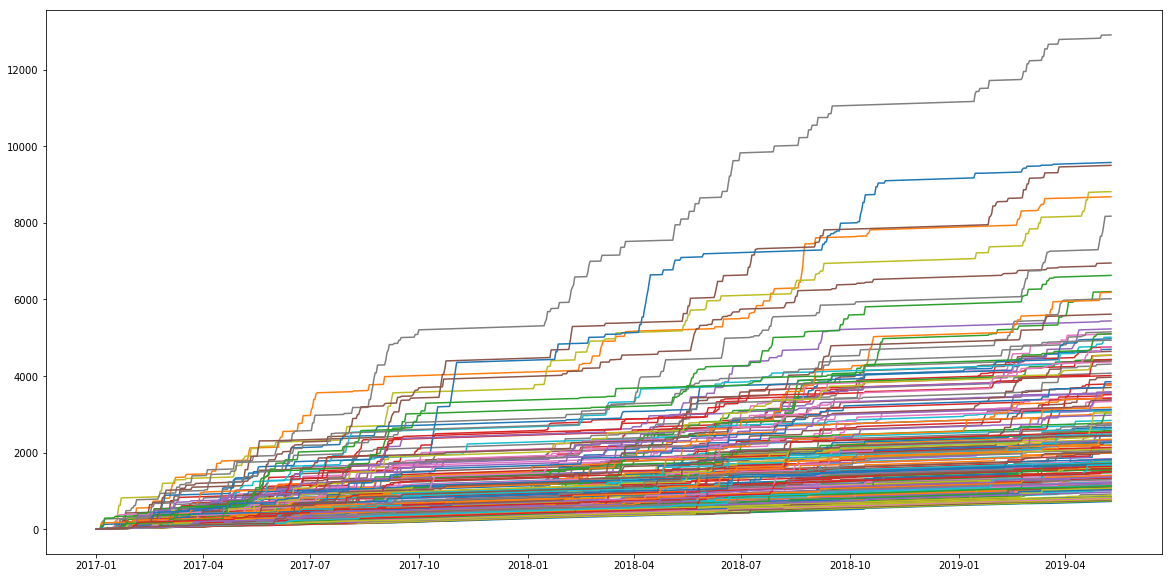

In [6]:
for rider in data.columns:
    plt.plot(data[rider])

## Calculate returns

In [175]:
returns = np.log(data.cumsum()) - np.log(data.cumsum().shift(1))
returns.dropna(inplace=True)

In [176]:
returns.head()

Adam Hansen  Alexis Vuillermoz  Amanuel Ghebreigzabhier  \
date                                                                  
2017-01-02  1.098612     1.098612           1.098612                  
2017-01-03  0.693147     0.693147           0.693147                  
2017-01-04  0.510826     0.510826           0.510826                  
2017-01-05  0.405465     0.405465           0.405465                  
2017-01-06  0.336472     0.336472           0.336472                  

            Amaro Antunes  Andrea Garosio  Andrea Vendrame  Andrey Amador  \
date                                                                        
2017-01-02  1.098612       1.098612        1.098612         1.098612        
2017-01-03  0.693147       0.693147        0.693147         0.693147        
2017-01-04  0.510826       0.510826        0.510826         0.510826        
2017-01-05  0.405465       0.405465        0.405465         0.405465        
2017-01-06  0.336472       0.336472        0.336472         0.336472        

            Andrey Zeits  Antonio Nibali  Antonio Pedrero  Antwan Tolhoek  \
date                                                                        
2017-01-02  1.098612      1.098612        1.098612         1.098612         
2017-01-03  0.693147      0.693147        0.693147         0.693147         
2017-01-04  0.510826      0.510826        0.510826         0.510826         
2017-01-05  0.405465      0.405465        0.405465         0.405465         
2017-01-06  0.336472      0.336472        0.336472         0.336472         

            Arnaud Démare  Awet Gebremedhin  Bauke Mollema  Ben Gastauer  \
date                                                                       
2017-01-02  1.098612       1.098612          1.098612       1.098612       
2017-01-03  0.693147       0.693147          0.693147       0.693147       
2017-01-04  0.510826       0.510826          0.510826       0.510826       
2017-01-05  0.405465       0.405465          0.405465       0.405465       
2017-01-06  0.336472       0.336472          0.336472       0.336472       

            Ben O'Connor  Bob Jungels  Brent Bookwalter  Caleb Ewan  \
date                                                                  
2017-01-02  1.098612      1.098612     1.098612          1.098612     
2017-01-03  0.693147      0.693147     0.693147          0.693147     
2017-01-04  0.510826      0.510826     0.510826          0.510826     
2017-01-05  0.405465      0.405465     0.405465          0.405465     
2017-01-06  0.336472      0.336472     0.336472          0.336472     

            Cesare Benedetti  Chad Haga  Chris Hamilton  Christian Knees  \
date                                                                       
2017-01-02  1.098612          1.098612   1.098612        1.098612          
2017-01-03  0.693147          0.693147   0.693147        0.693147          
2017-01-04  0.510826          0.510826   0.510826        0.510826          
2017-01-05  0.405465          0.405465   0.405465        0.405465          
2017-01-06  0.336472          0.336472   0.336472        0.336472          

            Christopher Juul-Jensen  Conor Dunne  Damiano Caruso  \
date                                                               
2017-01-02  1.098612                 1.098612     1.098612         
2017-01-03  0.693147                 0.693147     0.693147         
2017-01-04  0.510826                 0.510826     0.510826         
2017-01-05  0.405465                 0.405465     0.405465         
2017-01-06  0.336472                 0.336472     0.336472         

            Damiano Cima  Daniel Navarro  Danilo Wyss  Dario Cataldo  \
date                                                                   
2017-01-02  1.098612      1.098612        1.098612     1.098612        
2017-01-03  0.693147      0.693147        0.693147     0.693147        
2017-01-04  0.510826      0.510826        0.510826     0.510826        
2017-01-05  0.405465      0.40546

## Simulate Teams 

In [95]:
vg_riders = pd.read_pickle('vg_rider_list.pkl')

In [96]:
all_rounders = list(vg_riders[vg_riders['class']=='All Rounder'].rider)
climbers = list(vg_riders[vg_riders['class']=='Climber'].rider)
sprinters = list(vg_riders[vg_riders['class']=='Sprinter'].rider)
unclassed = list(vg_riders[vg_riders['class']=='Unclassed'].rider)
wildcards = list(vg_riders.rider)

In [97]:
vg_riders.head()

rider                             team        class  points  \
0  Primož Roglič       Team Jumbo-Visma                 All Rounder  0        
1  Simon Yates         Mitchelton-Scott                 Climber      0        
2  Tom Dumoulin        Team Sunweb                      All Rounder  0        
3  Vincenzo Nibali     Bahrain Merida Pro Cycling Team  All Rounder  0        
4  Miguel Angel López  Astana Pro Team                  All Rounder  0        

   cost  
0  24    
1  22    
2  22    
3  18    
4  16

In [98]:
def get_teams(vg_riders,simulations):
    
    all_rounders = list(vg_riders[vg_riders['class']=='All Rounder'].rider)
    climbers = list(vg_riders[vg_riders['class']=='Climber'].rider)
    sprinters = list(vg_riders[vg_riders['class']=='Sprinter'].rider)
    unclassed = list(vg_riders[vg_riders['class']=='Unclassed'].rider)
    wildcards = list(vg_riders.rider)
    
    teams = []
    for unclass in itertools.combinations(unclassed[::-1], 3):
        
        for sprinter in sprinters:
            
            for climber in itertools.combinations(climbers[::-1], 2):
                
                for all_rounder in itertools.combinations(all_rounders[::-1], 2):

                    team = []
                    team.extend(all_rounder)
                    team.extend(climber)
                    team.append(sprinter)
                    team.extend(unclass)
                    
                    for wildcard in [x for x in wildcards if x not in team][::-1]:
                        
                        team = []
                        team.extend(all_rounder)
                        team.extend(climber)
                        team.append(sprinter)
                        team.extend(unclass)
                        team.append(wildcard)
                        
                        tmp_df = vg_riders[vg_riders.rider.isin(team)]
                        
                        if tmp_df.cost.sum() <= 100:
                            teams.append(team)
                            
                        if len(teams) > simulations:
                            return teams

In [126]:
teams = get_teams(vg_riders,1000000)

In [127]:
def team_score(returns,team):
    
    team_data = returns[team]
    
    ret = team_data.as_matrix()
    
    p = np.asmatrix(np.mean(ret, axis=1))

    C = np.asmatrix(np.cov(ret))

    mu = p.T.sum()
    
    sigma = np.sqrt(C.sum())
    
    return {'mu':mu,'sigma':sigma}


In [130]:
len(sims)

276856

In [ ]:
sims = []
for team in teams:
    sims.append(team_score(returns,team))

In [ ]:
sims.head()

In [131]:
sims = pd.DataFrame(sims)

In [132]:
sims.shape

(276856, 2)

Text(0.5,1,'Mean and standard deviation of returns of randomly generated teams')

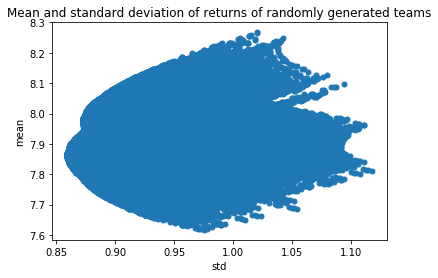

In [133]:
plt.plot(sims.sigma, sims.mu, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated teams')

In [134]:
vg_riders[vg_riders.rider.isin(teams[(sims.mu/sims.sigma).idxmax()])]

rider                     team        class  points  cost
5    Elia Viviani      Deceuninck - Quick Step  Sprinter     0       16  
22   Pavel Sivakov     Team INEOS               All Rounder  0       10  
33   Andrey Amador     Movistar Team            All Rounder  0       8   
36   Enrico Battaglin  Team Katusha - Alpecin   Unclassed    0       8   
40   Giulio Ciccone    Trek - Segafredo         Climber      0       8   
54   Jan Hirt          Astana Pro Team          Climber      0       6   
173  Markel Irizar     Trek - Segafredo         Unclassed    0       4   
174  Matteo Moschetti  Trek - Segafredo         Unclassed    0       4   
175  Marco Marcato     UAE-Team Emirates        Unclassed    0       4

In [140]:
vg_riders[vg_riders.rider.isin(teams[(sims.mu).idxmax()])].cost.sum()

96

In [141]:
vg_riders[vg_riders.rider.isin(teams[(sims.mu).idxmax()])]

rider                             team        class  points  \
0    Primož Roglič       Team Jumbo-Visma                 All Rounder  0        
2    Tom Dumoulin        Team Sunweb                      All Rounder  0        
5    Elia Viviani        Deceuninck - Quick Step          Sprinter     0        
15   Domenico Pozzovivo  Bahrain Merida Pro Cycling Team  Climber      0        
54   Jan Hirt            Astana Pro Team                  Climber      0        
65   Jakub Mareczko      CCC Team                         Sprinter     0        
173  Markel Irizar       Trek - Segafredo                 Unclassed    0        
174  Matteo Moschetti    Trek - Segafredo                 Unclassed    0        
175  Marco Marcato       UAE-Team Emirates                Unclassed    0        

     cost  
0    24    
2    22    
5    16    
15   10    
54   6     
65   6     
173  4     
174  4     
175  4

In [143]:
sims.mu.idxmax()

270609

In [145]:
sims.iloc[sims.mu.idxmax()]

mu       8.267811
sigma    1.020681
Name: 270609, dtype: float64